<a href="https://colab.research.google.com/github/Nichanan670510741/Nichanan/blob/main/Lab06_SVM_670510741.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Statistical Learning for Data Science 2 (229352)
#### Instructor: Donlapark Ponnoprat

#### [Course website](https://donlapark.pages.dev/229352/)

## Lab #6

## Support Vector Machines (SVM)

[SVM module documentation](https://scikit-learn.org/stable/modules/svm.html#svm)

[LinearSVC documentation](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC)

[SVC documentation](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC  # fast but only linear
from sklearn.svm import SVC  # slower but can do kernels

In [2]:
# Load the iris data
iris = datasets.load_iris()
X = iris.data[:, 2:]
y = iris.target

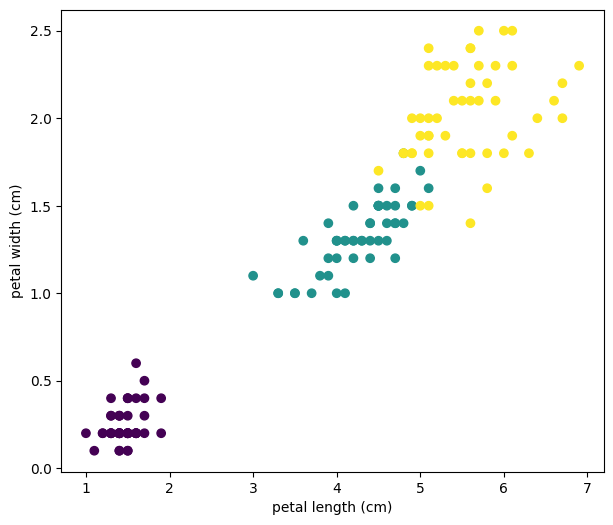

In [3]:
# Plot the data
plt.figure(figsize=(7,6))
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[3])
plt.show()

#### In this problem, you'll use support vector machines to classify the Iris data

#### The following function helps you plot the decision boundary.

In [4]:
# Plot the decision boundaries
def plot_decision_boundary(clf, X, y):
    h = 0.005  # Boundary lines' resolution
    x_min, x_max = X[:,0].min() - 10*h, X[:,0].max() + 10*h
    y_min, y_max = X[:,1].min() - 10*h, X[:,1].max() + 10*h
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(7,6))
    plt.contourf(xx, yy, Z, alpha=0.25)  # Background
    plt.contour(xx, yy, Z, colors='k', linewidths=0.2)  # Boundary lines
    plt.scatter(X[:,0], X[:,1], c=y);  # Data points
    plt.xlabel(iris.feature_names[2])
    plt.ylabel(iris.feature_names[3])

#### Exercise 1. Split the data into training set and test set.

In [6]:
#TODO
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Exercise 2. Learn a linear SVM classifier using sklearn.svm.LinearSVC. You will need to set `loss='hinge'`.

#### Try different values of the tradeoff parameter: `C = 0.01, 0.1, 1.0, 10.0, 100.0` and use `plot_decision_boundary` to plot the decision boundary.

#### If you encounter `RuntimeError`, consider setting `max_iter=100000`

#### What is the effect of `C` on the decision boundary?

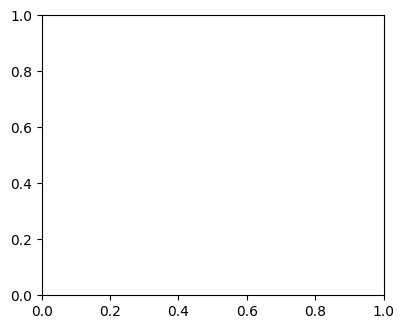

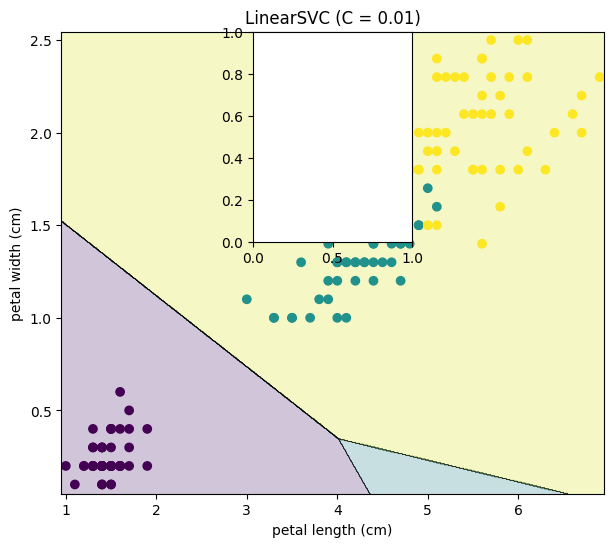

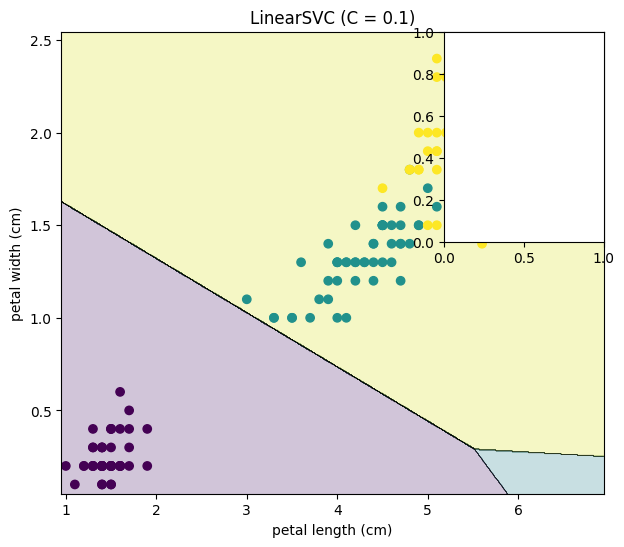

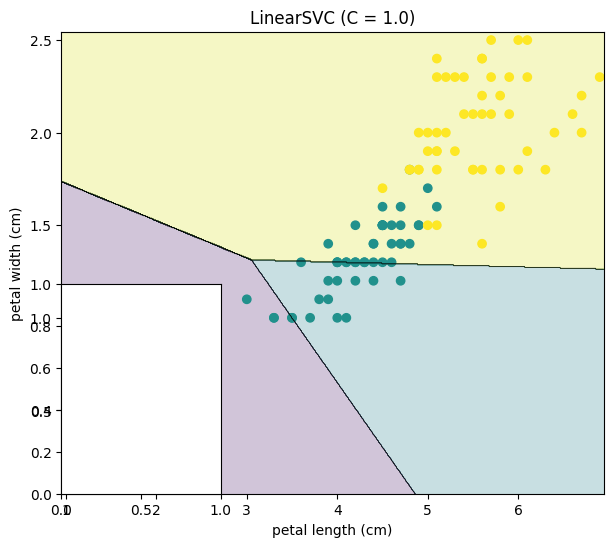

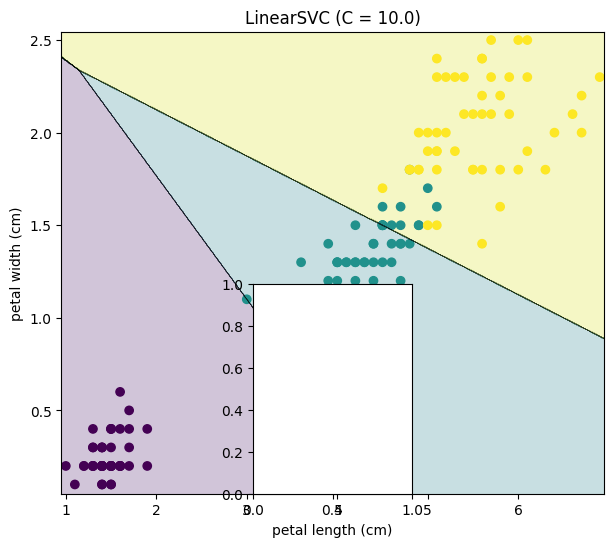

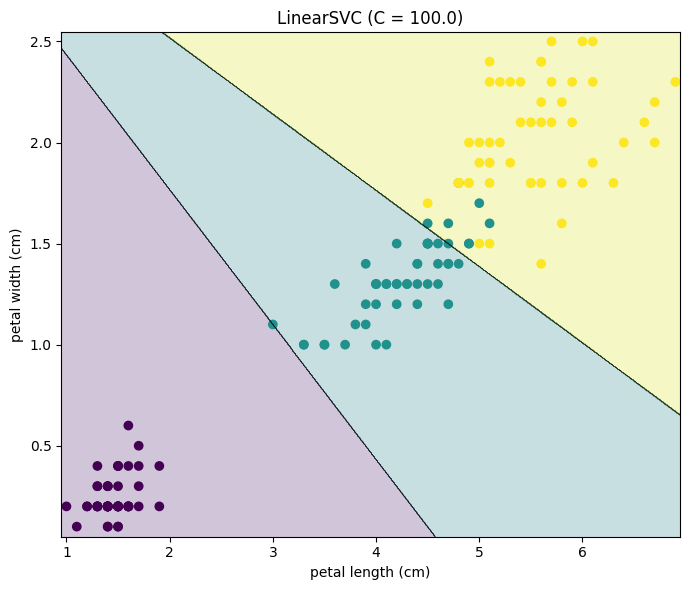

In [7]:
#TODO
# Exercise 2: Linear SVM with different C values

C_values = [0.01, 0.1, 1.0, 10.0, 100.0]

plt.figure(figsize=(15, 8))

for i, C in enumerate(C_values):
    clf = LinearSVC(
        C=C,
        loss='hinge',
        max_iter=100000,
        random_state=42
    )
    clf.fit(X, y)

    plt.subplot(2, 3, i + 1)
    plot_decision_boundary(clf, X, y)
    plt.title(f"LinearSVC (C = {C})")

plt.tight_layout()
plt.show()


#### Exercise 3. Pick a value of `C` that you like. Then report the test error.

In [8]:
#TODO
clf = LinearSVC(
    C=1.0,
    loss='hinge',
    max_iter=100000,
    random_state=42
)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
test_error = np.mean(y_pred != y_test)
test_error


np.float64(0.16666666666666666)

#### Exercise 4. Now try kernel SVM with a quadratic kernel. You can do this with sklearn.svm.SVC, setting `kernel='rbf'` and `C = 1.0`.

#### Try different values of the tradeoff parameter: `gamma = 0.01, 0.1, 1.0, 10.0, 100.0` and use `plot_decision_boundary` to plot the decision boundary.

#### If you encounter `RuntimeError`, consider setting `max_iter=100000`

#### What is the effect of `gamma` on the decision boundary?

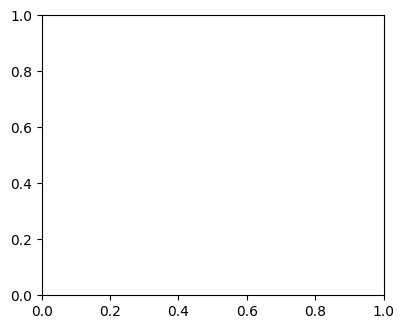

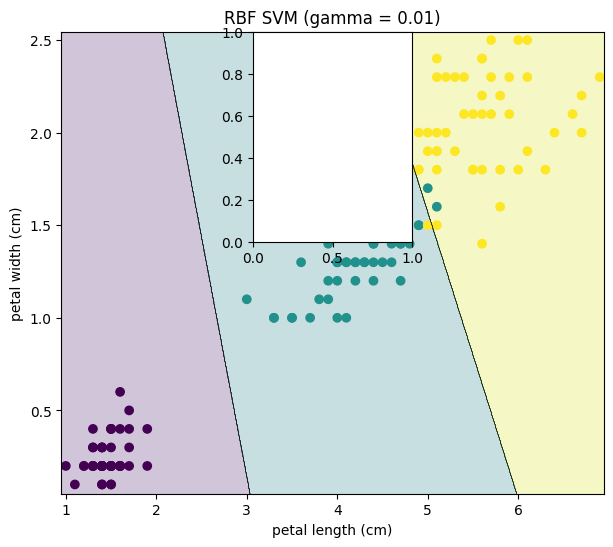

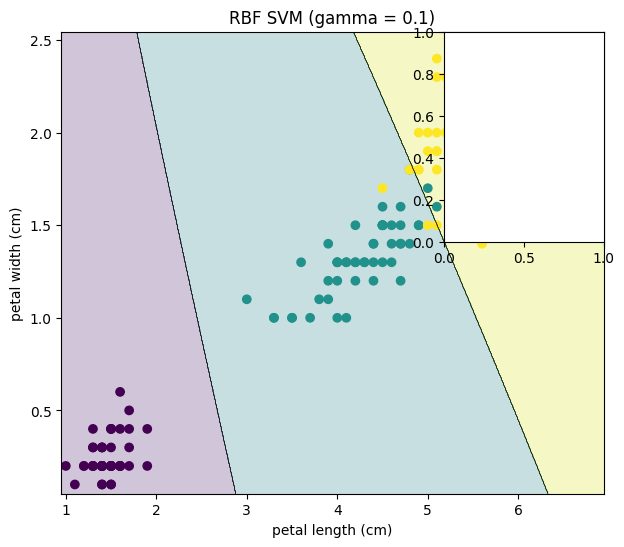

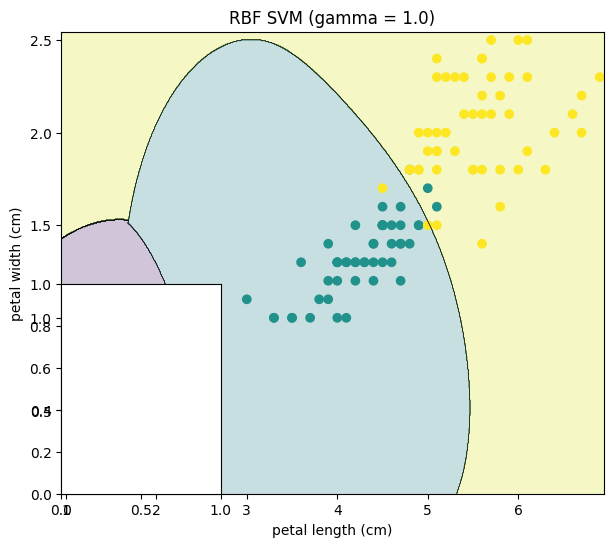

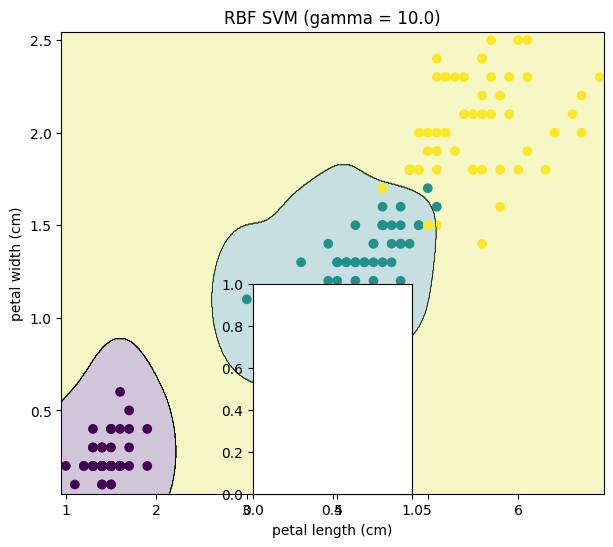

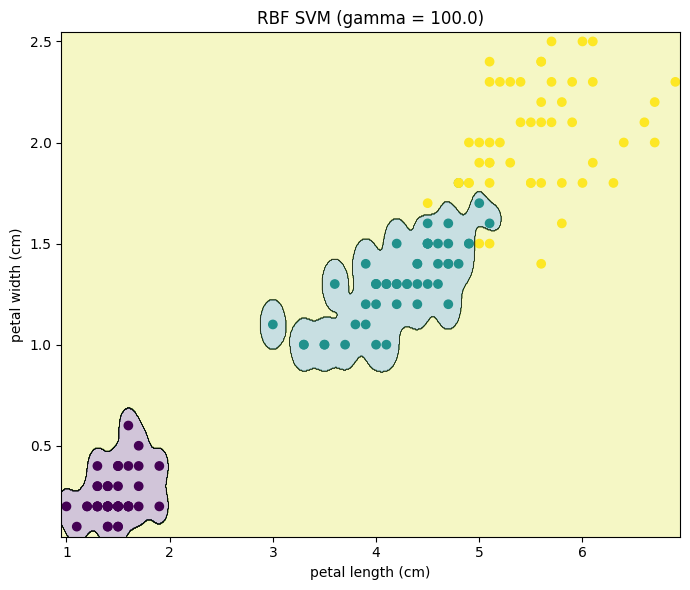

In [9]:
#TODO
from sklearn.svm import SVC
import matplotlib.pyplot as plt

gamma_values = [0.01, 0.1, 1.0, 10.0, 100.0]

plt.figure(figsize=(15, 8))

for i, gamma in enumerate(gamma_values):
    clf = SVC(
        kernel='rbf',
        C=1.0,
        gamma=gamma,
        max_iter=100000
    )
    clf.fit(X, y)

    plt.subplot(2, 3, i + 1)
    plot_decision_boundary(clf, X, y)
    plt.title(f"RBF SVM (gamma = {gamma})")

plt.tight_layout()
plt.show()


#### Exercise 5. Pick a value of `gamma` that you like. Then report the test error and the number of support vectors.

In [11]:
#TODO
from sklearn.svm import SVC
import numpy as np

clf = SVC(
    kernel='rbf',
    C=1.0,
    gamma=0.1,
    max_iter=100000
)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

test_error = np.mean(y_pred != y_test)

num_sv = clf.support_.shape[0]

test_error, num_sv


(np.float64(0.0), 45)

#### Exercise 6. Between Linear SVM and Kernel SVM, which model would you prefer to use for classification of Iris data?
1. Explain using test accuracy
2. Explaing using decision boundary plot

In [12]:
#TODO
from sklearn.svm import LinearSVC
import numpy as np

linear_svm = LinearSVC(
    C=1.0,
    loss='hinge',
    max_iter=100000,
    random_state=42
)

linear_svm.fit(X_train, y_train)

# Test accuracy
y_pred_linear = linear_svm.predict(X_test)
linear_test_accuracy = np.mean(y_pred_linear == y_test)

linear_test_accuracy


np.float64(0.8333333333333334)

In [13]:
#RBF
from sklearn.svm import SVC

kernel_svm = SVC(
    kernel='rbf',
    C=1.0,
    gamma=0.1,
    max_iter=100000
)

kernel_svm.fit(X_train, y_train)

# Test accuracy
y_pred_kernel = kernel_svm.predict(X_test)
kernel_test_accuracy = np.mean(y_pred_kernel == y_test)

kernel_test_accuracy


np.float64(1.0)

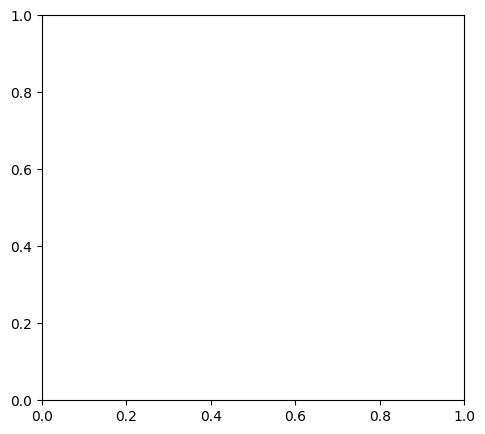

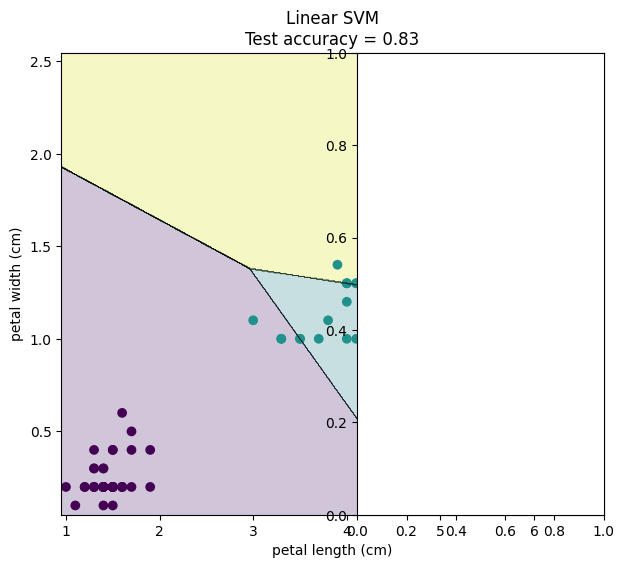

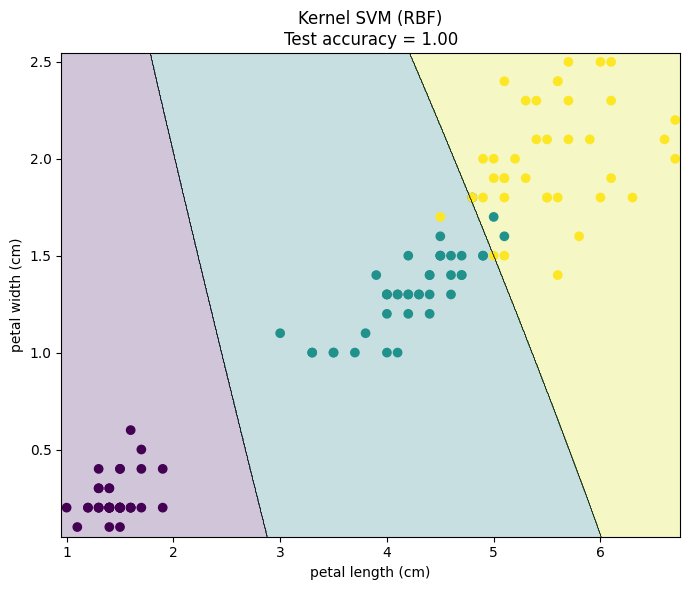

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# Linear SVM
plt.subplot(1, 2, 1)
plot_decision_boundary(linear_svm, X_train, y_train)
plt.title(f"Linear SVM\nTest accuracy = {linear_test_accuracy:.2f}")

# Kernel SVM
plt.subplot(1, 2, 2)
plot_decision_boundary(kernel_svm, X_train, y_train)
plt.title(f"Kernel SVM (RBF)\nTest accuracy = {kernel_test_accuracy:.2f}")

plt.tight_layout()
plt.show()


ควรเลือกใช้ Kernel SVM (RBF) สำหรับการจำแนกข้อมูล Iris
เนื่องจากให้ค่า test accuracy สูงกว่า Linear SVM

decision boundary ของ Kernel SVM มีลักษณะโค้งและยืดหยุ่น
สามารถแยกข้อมูลที่มีความไม่เป็นเชิงเส้นได้ดีกว่า
ในขณะที่ Linear SVM ใช้เส้นตรง ทำให้เกิด underfitting